In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df.shape)
df.head(2)

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [3]:
# select only relevant features
df = df.iloc[:, 2:]
df.sample(2)

,Age,EstimatedSalary,Purchased
89,35,50000,0
295,36,63000,0


# **Train test split ⚒️**

In [4]:
from sklearn.model_selection import train_test_split

# train_test_split(X, y, test_size=0.n)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# **StandardScaler ⚙️**

In [5]:
from sklearn.preprocessing import StandardScaler

# using StandardScaler to scale the values of "Input columns"
scaler = StandardScaler()

#fit the scalar to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [7]:
X_train_scaled[:3]

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719]])

In [8]:
# converting nd.arrays into pd.DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
X_train_scaled.head(3)

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177


## **Difference between Scaled and Original DataFrame**

In [10]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [11]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# **Effect of Scaling 🗿**

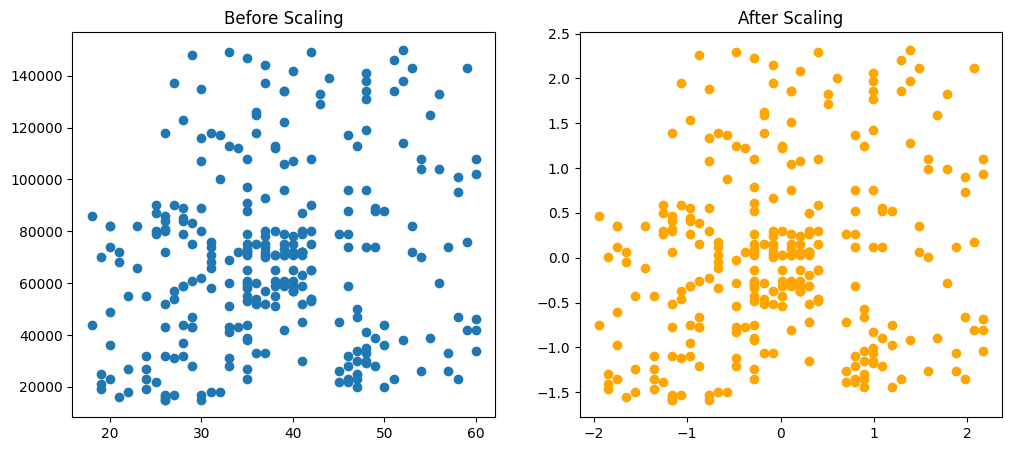

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='orange')
ax2.set_title('After Scaling')

plt.show()

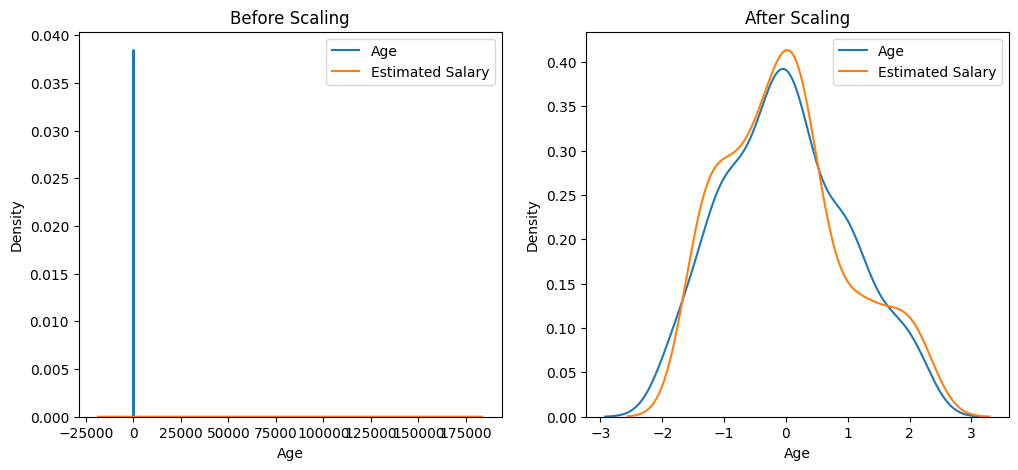

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1, label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, label='Estimated Salary')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, label='Estimated Salary')
ax2.legend()

plt.show()

## **Comparison of Distributions**

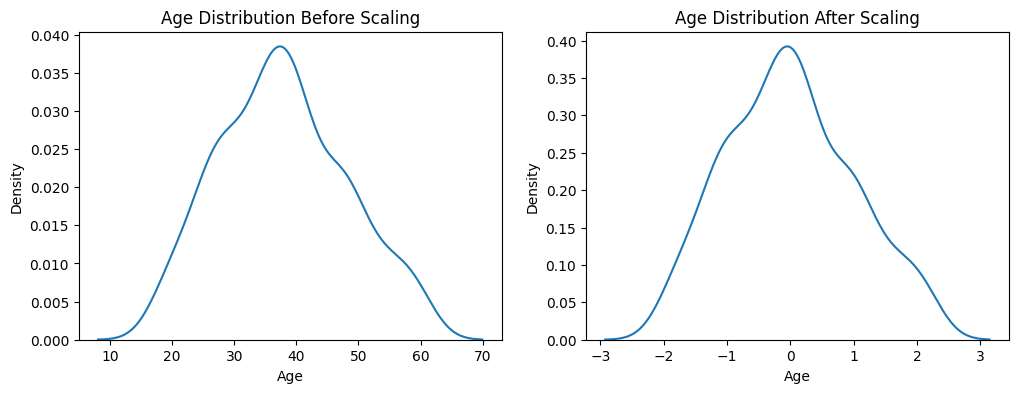

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

plt.show()

# **Why Scaling is important? 🤔**

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [17]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [19]:
from sklearn.metrics import accuracy_score

# testing the accuracy
print("Actual Model:", accuracy_score(y_test, y_pred))
print("Scaled Model:", accuracy_score(y_test, y_pred_scaled))

Actual Model: 0.6583333333333333
Scaled Model: 0.8666666666666667


## **Test it out on Decision Trees 🌳**

In [20]:
from sklearn.tree import DecisionTreeClassifier as DTC

# make DesicionTreeClassifier Objects
dt = DTC()
dt_scaled = DTC()

# train those objects
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

# make predictions
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [21]:
# check the accuracy
print("Actual Model:", accuracy_score(y_test, y_pred))
print("Scaled Model:", accuracy_score(y_test, y_pred_scaled))

Actual Model: 0.875
Scaled Model: 0.875


# **Effect of Outliers 🕵️**

In [22]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [23]:
df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})], ignore_index=True)

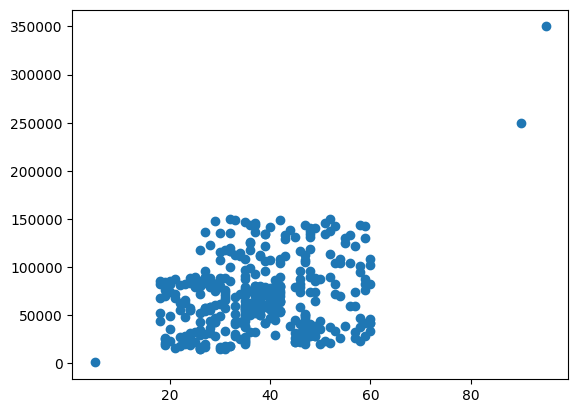

In [24]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [25]:
from sklearn.model_selection import train_test_split

# train_test_split(X, y, test_size=0.n)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [26]:
from sklearn.preprocessing import StandardScaler

# using StandardScaler to scale the values of "Input columns"
scaler = StandardScaler()

#fit the scalar to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

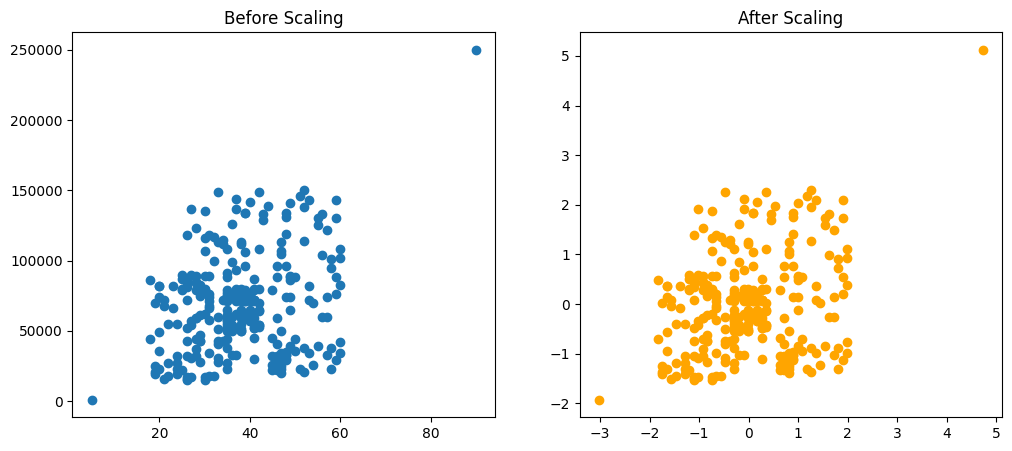

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='orange')
ax2.set_title('After Scaling')

plt.show()

# **When you'd be need to do Standardization? 🧐**
### When you will be working with very diverse data and have to work with distances aka euclidean distances then you need to use "SCALING". Mostly in Algorithms like:- K-means, KNN, PCA etc..